In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.cm import get_cmap

In [2]:
cols = ['date', 'N', 'sadness_count', 'sadness_retweet_sum']
cols += ['anxiety_count', 'anxiety_retweet_sum']
cols += ['anger_count', 'anger_retweet_sum']

In [3]:
df = pd.read_csv('liwc_result.csv', names=cols)
df.head()

,date,N,sadness_count,sadness_retweet_sum,anxiety_count,anxiety_retweet_sum,anger_count,anger_retweet_sum
0,2020-03-11,9995,415,914,735,2507,1014,3387
1,2020-03-12,4300,161,365,257,3564,381,3787
2,2020-03-13,9999,322,787,584,1238,842,10339
3,2020-03-14,14390,518,1681,725,6403,1171,5322
4,2020-03-15,5996,229,425,340,960,509,2058


In [4]:
df['sadness_retweet_rate'] = df.sadness_retweet_sum / df.sadness_count
df['anxiety_retweet_rate'] = df.anxiety_retweet_sum / df.anxiety_count
df['anger_retweet_rate'] = df.anger_retweet_sum / df.anger_count
df['sadness_proportion'] = df.sadness_count / df.N
df['anxiety_proportion'] = df.anxiety_count / df.N
df['anger_proportion'] = df.anger_count / df.N
df['month'] = df.date.apply(lambda x: int(x[-4]))
df.head()

,date,N,sadness_count,sadness_retweet_sum,anxiety_count,anxiety_retweet_sum,anger_count,anger_retweet_sum,sadness_retweet_rate,anxiety_retweet_rate,anger_retweet_rate,sadness_proportion,anxiety_proportion,anger_proportion,month
0,2020-03-11,9995,415,914,735,2507,1014,3387,2.202410,3.410884,3.340237,0.041521,0.073537,0.101451,3
1,2020-03-12,4300,161,365,257,3564,381,3787,2.267081,13.867704,9.939633,0.037442,0.059767,0.088605,3
2,2020-03-13,9999,322,787,584,1238,842,10339,2.444099,2.119863,12.279097,0.032203,0.058406,0.084208,3
3,2020-03-14,14390,518,1681,725,6403,1171,5322,3.245174,8.831724,4.544833,0.035997,0.050382,0.081376,3
4,2020-03-15,5996,229,425,340,960,509,2058,1.855895,2.823529,4.043222,0.038192,0.056704,0.084890,3


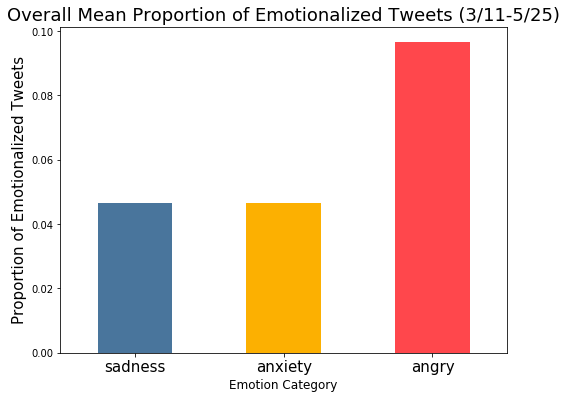

In [5]:
df_month = df[['sadness_proportion','anxiety_proportion','anger_proportion']].mean()
rename_d = {'sadness_proportion':'sadness', 'anxiety_proportion':'anxiety', 'anger_proportion':'angry'}
df_month.rename(index=rename_d, inplace=True)
df_month = df_month.T
df_month.plot(figsize=(8,6), kind='bar', color=['#49759c','#fcb001','#ff474c'])
plt.xticks(rotation=0, fontsize=15)
plt.ylabel('Proportion of Emotionalized Tweets', fontsize=15)
plt.xlabel('Emotion Category',fontsize=12)
plt.xticks(fontsize=15)
plt.title('Overall Mean Proportion of Emotionalized Tweets (3/11-5/25)', fontsize=18);

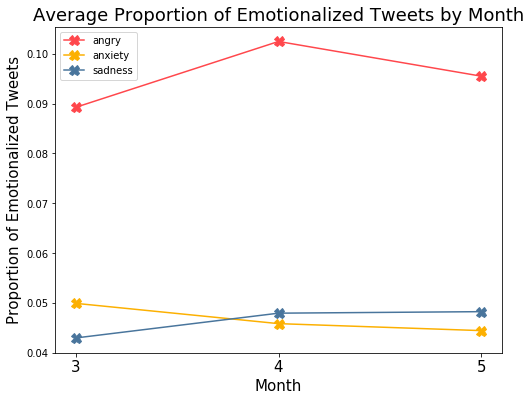

In [6]:
df_month = df.groupby('month')[['anger_proportion','anxiety_proportion','sadness_proportion']].mean()
rename_d = {'sadness_proportion':'sadness', 'anxiety_proportion':'anxiety', 'anger_proportion':'angry'}
df_month.rename(columns=rename_d, inplace=True)
df_month.plot(figsize=(8,6), marker='X', markersize=10, color=['#ff474c','#fcb001','#49759c'])
plt.xlabel('Month', fontsize=15)
plt.ylabel('Proportion of Emotionalized Tweets', fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(np.arange(3,6),fontsize=15)
plt.title('Average Proportion of Emotionalized Tweets by Month', fontsize=18);

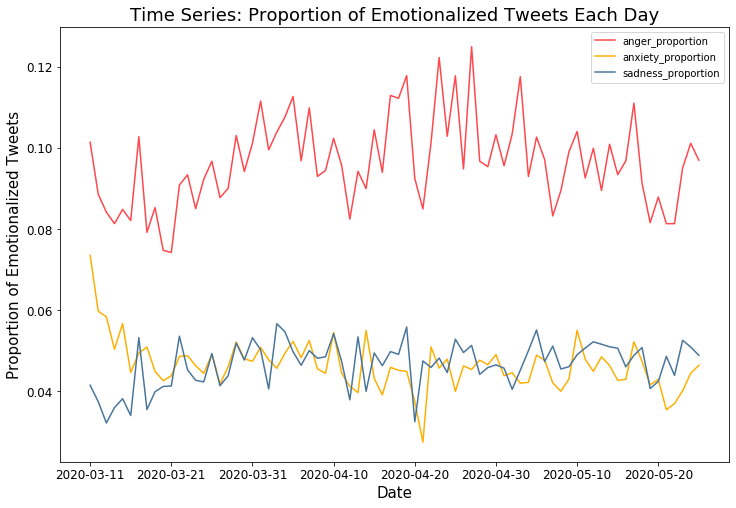

In [7]:
y_cols = ['anger_proportion', 'anxiety_proportion','sadness_proportion']
df.plot(x='date', y=y_cols, figsize=(12,8), color=['#ff474c','#fcb001','#49759c'])
plt.ylabel('Proportion of Emotionalized Tweets', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Time Series: Proportion of Emotionalized Tweets Each Day', fontsize=18);

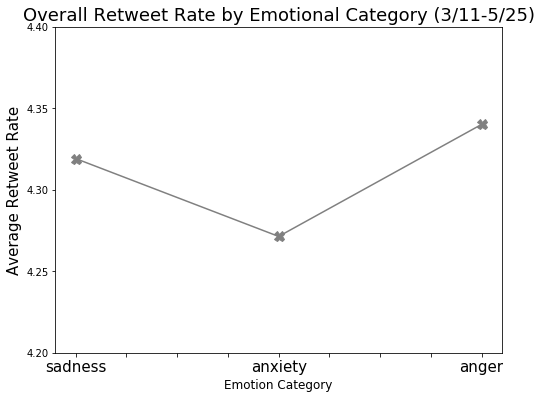

In [8]:
total = []
total.append(['sadness', (df.sadness_retweet_sum / df.sadness_count).mean()])
total.append(['anxiety', (df.anxiety_retweet_sum / df.anxiety_count).mean()])
total.append(['anger', (df.anger_retweet_sum / df.anger_count).mean()])

total_df = pd.DataFrame(total, columns=['Emotion', 'Retweet_Rate'])
total_df.plot(x='Emotion', y='Retweet_Rate', kind='line', legend=None, marker='X', figsize=(8,6), markersize=10, color='grey')
plt.ylabel('Average Retweet Rate', fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.xlabel('Emotion Category',fontsize=12)
plt.yticks(ticks=np.arange(4.2, 4.4, 0.05))
plt.title('Overall Retweet Rate by Emotional Category (3/11-5/25)', fontsize=18);

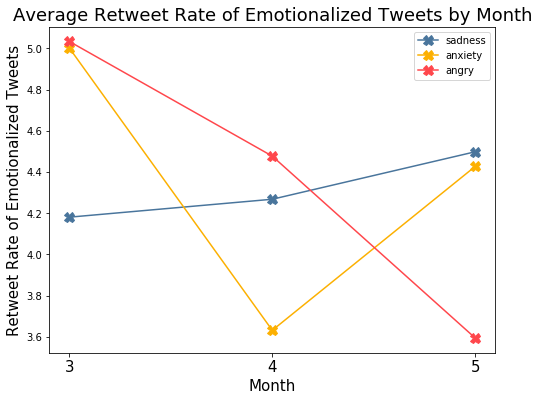

In [9]:
df_month = df.groupby('month')[['sadness_retweet_rate','anxiety_retweet_rate','anger_retweet_rate']].mean()
rename_d = {'sadness_retweet_rate':'sadness', 'anxiety_retweet_rate':'anxiety', 'anger_retweet_rate':'angry'}
df_month.rename(columns=rename_d, inplace=True)

df_month.plot(figsize=(8,6), marker='X',color=['#49759c','#fcb001','#ff474c'], markersize=10)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Retweet Rate of Emotionalized Tweets', fontsize=15)
plt.xticks(np.arange(3,6),fontsize=15)
plt.title('Average Retweet Rate of Emotionalized Tweets by Month', fontsize=18);

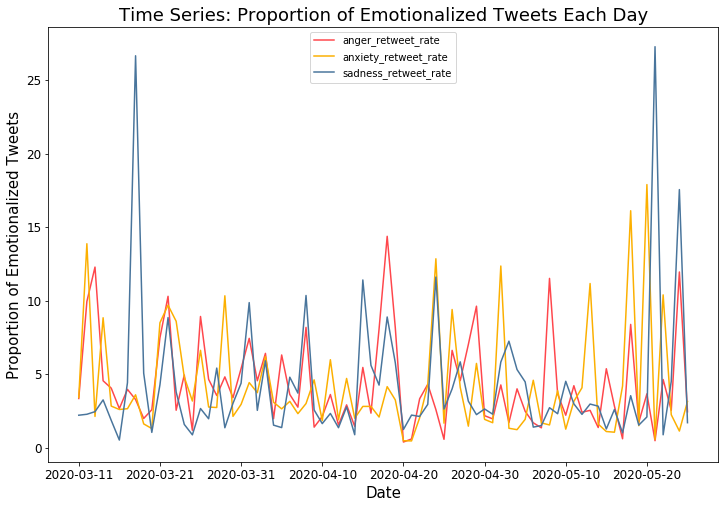

In [10]:
y_cols = ['anger_retweet_rate', 'anxiety_retweet_rate','sadness_retweet_rate']
df.plot(x='date', y=y_cols, figsize=(12,8), color=['#ff474c','#fcb001','#49759c'])
plt.ylabel('Proportion of Emotionalized Tweets', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Time Series: Proportion of Emotionalized Tweets Each Day', fontsize=18);

In [11]:
df.N.sum()

677809